<a href="https://colab.research.google.com/github/Barbhuiya12/Hydrology-/blob/main/Standard_Precipitation_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Packages

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Load Data

In [4]:
data = pd.read_csv('Basin.csv')
data.head(5)

,Dates,P
0,1970-01-01,3.356473
1,1970-02-01,30.651740
2,1970-03-01,38.034492
3,1970-04-01,60.054979
4,1970-05-01,53.295856


SPI Function (self-defined)

In [5]:
#Standardized Precipitation Index Function
def spi(ds, thresh):
    #ds - data ; thresh - time interval / scale
    
    #Rolling Mean / Moving Averages
    ds_ma = ds.rolling(thresh, center=False).mean()
    
    #Natural log of moving averages
    ds_In = np.log(ds_ma)
    ds_In[ np.isinf(ds_In) == True] = np.nan  #Change infinity to NaN
    
    #Overall Mean of Moving Averages
    ds_mu = np.nanmean(ds_ma)
    
    #Summation of Natural log of moving averages
    ds_sum = np.nansum(ds_In)
        
    #Computing essentials for gamma distribution
    n = len(ds_In[thresh-1:])                  #size of data
    A = np.log(ds_mu) - (ds_sum/n)             #Computing A
    alpha = (1/(4*A))*(1+(1+((4*A)/3))**0.5)   #Computing alpha  (a)
    beta = ds_mu/alpha                         #Computing beta (scale)
    
    #Gamma Distribution (CDF)
    gamma = st.gamma.cdf(ds_ma, a=alpha, scale=beta)  
    
    #Standardized Precipitation Index   (Inverse of CDF)
    norm_spi = st.norm.ppf(gamma, loc=0, scale=1)  #loc is mean and scale is standard dev.
    
    return ds_ma, ds_In, ds_mu, ds_sum, n, A, alpha, beta, gamma, norm_spi

Perform SPI computation on Data at Varying Times

In [7]:
times = [3, 6, 9, 12, 24]
for i in times:
    x = spi(data['P'], i)
    data['spi_'+str(i)] = x[9]

Visualization of SPI

<ipython-input-8-cb3c8d907a08>:11: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks(range(-3,4), range(-3,4))
<ipython-input-8-cb3c8d907a08>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([],[])


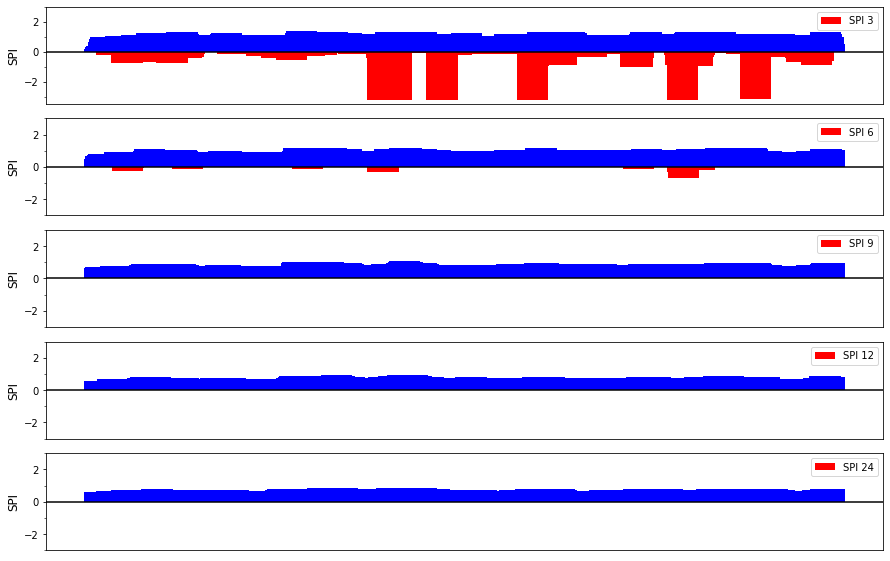

In [8]:
fig, axes = plt.subplots(nrows=5, figsize=(15, 10))
plt.subplots_adjust(hspace=0.15)
for i, ax in enumerate(axes):
    col_scheme=np.where(data['spi_'+str(times[i])]>0, 'b','r')

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.bar(data.index, data['spi_'+str(times[i])], width=25, align='center', color=col_scheme, label='SPI '+str(times[i]))
    ax.axhline(y=0, color='k')
    ax.xaxis.set_major_locator(mdates.YearLocator(2))
    ax.legend(loc='upper right')
    ax.set_yticks(range(-3,4), range(-3,4))
    ax.set_ylabel('SPI', fontsize=12)
    
    if i<len(times)-1:
        ax.set_xticks([],[])